In [1]:
import fwiVis.fwiVis as fv
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd

import pandas as pd
from pandas.errors import SettingWithCopyWarning
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr


from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
from shapely import wkt

import datetime
from datetime import date
import traceback

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
warnings.filterwarnings("ignore", category=SettingWithCopyWarning) 

In [2]:
### Read in a rasterized year
import glob

files = glob.glob("/projects/shared-buckets/ashiklom/WesternUS/files_for_paper/*.geojson")

files_1 = files[7]
fires = gpd.read_file(files_1)

In [3]:
#?fires.to_xarray

In [4]:
fires2 = fires[(fires.t > "2020-08-01")& ( fires.t < "2020-10-30")]
fires2[["t", "frp_max"]].sort_values(by = "frp_max")

,t,frp_max
6671,2020-09-13 00:00:00,0.26
1222,2020-10-10 00:00:00,0.30
2221,2020-09-23 00:00:00,0.32
6024,2020-09-16 00:00:00,0.41
6021,2020-09-21 00:00:00,0.41
...,...,...
63,2020-09-06 12:00:00,1603.87
9273,2020-09-16 12:00:00,1659.09
7918,2020-10-04 00:00:00,1857.27
7911,2020-10-04 12:00:00,2480.22


In [5]:
#tmp = fires2.set_index(["t", "FireID", "id"])
#tmp = fires
#tmp["test_merge"] = str(tmp.t) + tmp.FireID
#tmp = tmp.to_xarray()

#tmp
#tmp[tmp.index == "('2020-09-17 12:00:00', 'F12244')"]

#tmp = tmp.to_xarray()
#tmp
#tmp[tmp.FireID == 'F12244']

In [6]:
# example = pd.DataFrame({"t":["2020-05-18 00:00:00", "2020-05-17 12:00:00"], 
#                         "geometry":["POLYGON ((-112.01965966172988 33.847162226963476, -112.00119569986678 33.84892867068211, -111.99220894960493 33.85064041482308, -111.98165671264799 33.85853720177232, -111.98090089514638 33.86136925108656, -111.98084667720971 33.86153353095624, -111.98077318451573 33.861692682221054, -111.98068115524806 33.861845106063384, -111.98057151382108 33.861989271238706, -111.98044536159668 33.86212372945998, -111.98030396582294 33.862247129948436, -111.98014874690512 33.86235823300532, -111.9799812641373 33.86245592246789, -111.97980320003761 33.86253921692392, -111.97961634344459 33.86260727957326, -111.97942257154467 33.86265942663587, -111.97922383101103 33.862695134222676, -111.979022118444 33.8627140436, -111.9788194603091 33.86271596479392, -111.97861789257489 33.862700878499865, -111.97841944025508 33.862668936276265, -111.9782260970607 33.86262045902218, -111.97803980536713 33.86255593375272, -111.97786243669712 33.862476008705634, -111.97769577291626 33.86238148682763, -111.97754148832988 33.862273317706745, -111.97740113286132 33.86215258803082, -111.97727611648084 33.862020510668735, -111.97373615176265 33.85786245509311, -111.97362386842568 33.85771462728812, -111.97353071537296 33.85755758631497, -111.97345770264471 33.85739303512709, -111.973405621863 33.85722275810757, -111.97337503765226 33.85704860171882, -111.97336628152198 33.856872454477845, -111.97337944827761 33.85669622647708, -111.97341439499897 33.85652182867157, -111.97430647628607 33.853149841562804, -111.97436039141292 33.85298531470524, -111.97443362940321 33.85282589834573, -111.97452545292624 33.85267319716951, -111.97463493758349 33.85252874825689, -111.97476098121709 33.852394005612474, -111.9809330200267 33.846428090726945, -111.98108935286812 33.8462926144336, -111.98126229893415 33.84617218804351, -111.98144974961481 33.846068279771764, -111.99202463358378 33.84087638268918, -111.99219152745361 33.840802815368974, -111.99236560323162 33.84074241949829, -111.99254536450483 33.84069571425012, -111.99272926599635 33.84066310110882, -111.9929157268468 33.84064486041984, -111.99310314420143 33.84064114898034, -111.99328990698596 33.84065199869128, -111.99347440975323 33.840677316284136, -111.99785191550515 33.841455052144006, -112.0019486635434 33.84217757203369, -112.02027335843965 33.84146569842612, -112.0231617484476 33.83911429314538, -112.0197137461063 33.841921248666154, -112.01958616010131 33.84203490561246, -112.01947131941243 33.84215769938807, -112.01937018399823 33.84228860362591, -112.01772914692854 33.84463857877042, -112.01763551078844 33.84478920342574, -112.01756008740007 33.844946666585685, -112.01750362567942 33.84510940495811, -112.01746668630135 33.845275802868045, -112.01744963612865 33.845444208297415, -112.01745264456513 33.84561294928634, -112.01747568186848 33.84578035053225, -112.01751851944084 33.845944750023016, -112.01758073209334 33.846104515538556, -112.01766170226318 33.84625806085655, -112.01776062614103 33.8464038615029, -112.01787652164828 33.846540469888204, -112.01800823818493 33.84666652968211, -112.0181544680518 33.84678078928115, -112.01831375943308 33.846882114237204, -112.01848453081091 33.84696949852273, -112.01866508666866 33.84704207452076, -112.01885363432675 33.84709912164107, -112.01904830174418 33.847140073475366, -112.01924715610849 33.84716452342256, -112.01944822302957 33.84717222872599, -112.0196495061468 33.84716311288454, -112.0253336236241 33.84666709843979, -112.01965966172988 33.847162226963476))",
#                                    "POLYGON ((-112.0231617484476 33.83911429314538, -112.0233095561006 33.839004945085186, -112.02346907396296 33.83890793190307, -112.0236388069369 33.83882416283437, -112.02381716420149 33.838754422982966, -112.02400247412116 33.838699365964885, -112.02419299991094 33.83865950778337, -112.02438695591167 33.838635221994075, -112.02458252432302 33.83862673620458, -112.02477787223711 33.83863412994172, -112.02497116881376 33.83865733390674, -112.02516060243622 33.838696130624605, -112.02534439768682 33.838750156481915, -112.02552083198373 33.83881890513451, -112.02568825172285 33.838901732251756, -112.02584508777377 33.83899786155473, -112.02598987018457 33.839106392090564, -112.02612124195801 33.83922630667464, -112.02623797176946 33.83935648142318, -112.02633896550823 33.839495696284885, -112.02642327653327 33.83964264647445, -112.02649011454767 33.83979595470039, -112.0265388530084 33.83995418407222, -112.02656903500198 33.84011585156723, -112.02716414924478 33.84477683563698, -112.02717553631622 33.844944513737545, -112.02716702052754 33.845112560973405, -112.02713868559533 33.84527932284504, -112.02709081036748 33.84544315749682, -112.02702386608246 33.84560245188245, -112.02693851173434 33.84575563764703, -112.02683558758879 33.84590120656914, -112.02671610691351 33.84603772541193, -112.02658124600497 33.84616385003521, -112.02643233260876 33.84627833863162, -112.0262708328484 33.84638006395438, -112.02609833679031 33.84646802441826, -112.02591654278788 33.84654135396245, -112.02572724075824 33.84659933057938, -112.02553229455705 33.846641383424696, -112.0253336236241 33.84666709843979, -112.0196495061468 33.84716311288454, -112.01944822302957 33.84717222872599, -112.01924715610849 33.84716452342256, -112.01904830174418 33.847140073475366, -112.01885363432675 33.84709912164107, -112.01866508666866 33.84704207452076, -112.01848453081091 33.84696949852273, -112.01831375943308 33.846882114237204, -112.0181544680518 33.84678078928115, -112.01800823818493 33.84666652968211, -112.01787652164828 33.846540469888204, -112.01776062614103 33.8464038615029, -112.01766170226318 33.84625806085655, -112.01758073209334 33.846104515538556, -112.01751851944084 33.845944750023016, -112.01747568186848 33.84578035053225, -112.01745264456513 33.84561294928634, -112.01744963612865 33.845444208297415, -112.01746668630135 33.845275802868045, -112.01750362567942 33.84510940495811, -112.01756008740007 33.844946666585685, -112.01763551078844 33.84478920342574, -112.01772914692854 33.84463857877042, -112.01937018399823 33.84228860362591, -112.01947131941243 33.84215769938807, -112.01958616010131 33.84203490561246, -112.0197137461063 33.841921248666154, -112.0231617484476 33.83911429314538))"
#                                    ],
#                         "frp_max":[5.46, 23.87]
#                        })
# example.geometry = example.geometry.apply(wkt.loads)
# example = gpd.GeoDataFrame(example, crs = "EPSG:4326")

In [7]:
from geocube.api.core import make_geocube

In [8]:
fires2.columns

Index(['t', 'id', 'frp_max', 'frp_median', 'frp_mean', 'pixel_count',
       'frp_sum', 'unique_periods', 'date_min', 'date_max', 'FireID', 'Name',
       'Type', 'date_range_h', 'area', 'evt_mode', 'bs_mean', 'bs_median',
       'EVT_SBCLS', 'EVT_PHYS', 'EVT_LF', 'EVT_ORDER', 'EVT_CLASS',
       'geometry'],
      dtype='object')

In [9]:
fires2.total_bounds[0]

-123.98695994089147

In [10]:
#imerge = xr.open_dataset("s3://veda-data-store-staging/EIS/zarr/FWI-GEOS-5-Hourly", engine="zarr", chunks = "auto") #, chunks = "auto"

#imerge = xr.open_dataset("s3://veda-data-store-staging/EIS/zarr/FWI-GEOS-5-Hourly", engine="zarr", chunks = "auto") 
imerge = xr.open_dataset("s3://veda-data-store-staging/EIS/zarr/GEOS5_FWI_GPM_LATE_v5_Daily.zarr", engine="zarr")
imerge.rio.write_crs("epsg:4326", inplace=True)
imerge.rio.set_spatial_dims(x_dim = "lon", y_dim = "lat", inplace = True)
#imerge_year = imerge['GPM.LATE.v5_FWI'].loc["2020-01-01":"2020-10-31"]
imerge

tmp = imerge.rio.clip_box(minx = fires2.total_bounds[0], miny = fires2.total_bounds[1], maxx= fires2.total_bounds[2], maxy = fires2.total_bounds[3]) #auto_expand= True

tmp = tmp.rio.set_spatial_dims(x_dim = "lon", y_dim = "lat")

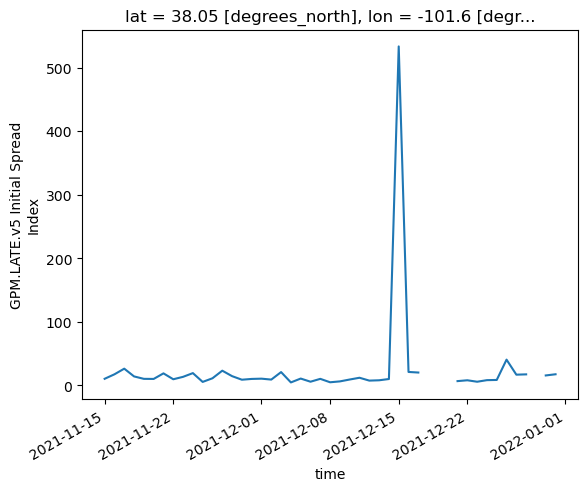

In [11]:
small_time = tmp.sel(time = slice("2021-11-15", "2022-01-01"))
small_time["GPM.LATE.v5_ISI"].sel(lat = 38, lon = -101.65, method='nearest').plot()

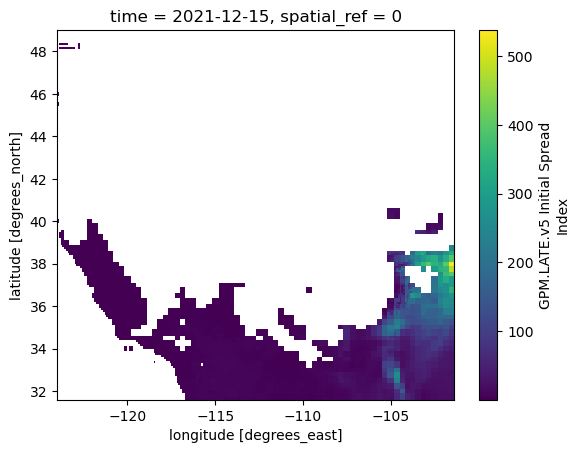

In [12]:
# small_time = small_time.rio.clip_box(minx = -104.0041071, miny = 40.8046094,
#                                      maxx= -100.4015687, maxy = 41.9966371) #auto_expand= True
small_time["GPM.LATE.v5_ISI"].sel(time = '2021-12-15T00:00:00.000000000').plot()

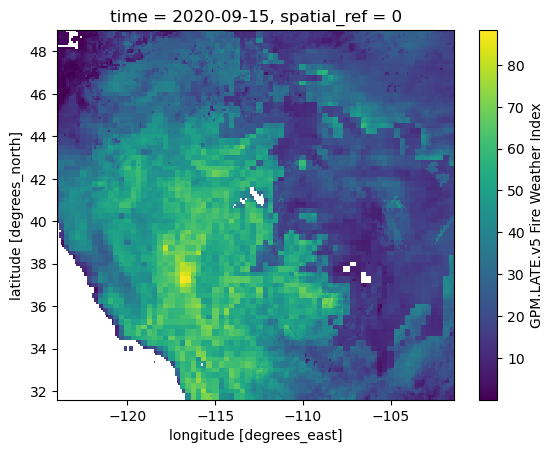

In [13]:
tmp["GPM.LATE.v5_FWI"].sel(time = '2020-09-15T00:00:00.000000000').plot()
plt.savefig("/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/2023_CMS_figures/fwi_map_september.png", dpi=800)

In [14]:

# def calc_anoms(temp, name, dim):
#     mean = temp[name].mean(dim = dim)
#     data = temp[name] - mean
#     return(data)


# # mean = tmp['GPM.LATE.v5_FWI'].mean( dim = 'time')
# # tmp['GPM.LATE.v5_FWI'] = tmp['GPM.LATE.v5_FWI'] - mean

# # mean = tmp['GPM.LATE.v5_ISI'].mean( dim = 'time')
# # tmp['GPM.LATE.v5_ISI'] = tmp['GPM.LATE.v5_ISI'] - mean


# # mean = tmp['GPM.LATE.v5_FFMC'].mean( dim = 'time')
# # tmp['GPM.LATE.v5_FFMC'] = tmp['GPM.LATE.v5_FFMC'] - mean
# for k in list(tmp.keys()):
#     tmp[k] = calc_anoms(tmp, k, dim = "time")

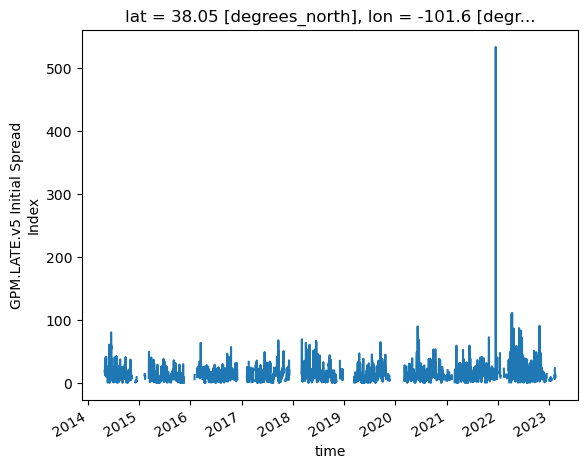

In [15]:
list(tmp.keys())

tmp["GPM.LATE.v5_ISI"].sel(lat = 38, lon = -101.65, method='nearest').plot()

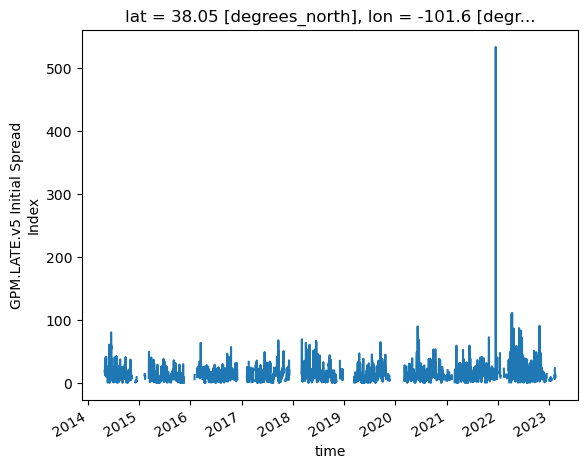

In [16]:
tmp["GPM.LATE.v5_ISI"].sel(lat = 38, lon = -101.65, method='nearest').plot()

In [17]:
fires2.t = fires2.t.astype("datetime64[ns]")
fires2

,t,id,frp_max,frp_median,frp_mean,pixel_count,frp_sum,unique_periods,date_min,date_max,...,area,evt_mode,bs_mean,bs_median,EVT_SBCLS,EVT_PHYS,EVT_LF,EVT_ORDER,EVT_CLASS,geometry
5,2020-09-05 00:00:00,239,7.12,4.03,4.030000,2.0,8.06,2.0,2020-09-05 00:00:00,2020-09-05 12:00:00,...,0.279900,7054.0,3.478964,4.0,Evergreen open tree canopy,Conifer,Tree,Tree-dominated,Open tree canopy,"POLYGON ((-111.14238 33.98530, -111.14238 33.9..."
6,2020-09-04 12:00:00,231,111.58,11.86,41.473333,3.0,124.42,3.0,2020-09-04 12:00:00,2020-09-05 12:00:00,...,0.087760,7054.0,3.052083,3.0,Evergreen open tree canopy,Conifer,Tree,Tree-dominated,Open tree canopy,"POLYGON ((-111.14018 33.98891, -111.14022 33.9..."
7,2020-09-03 12:00:00,214,111.58,11.86,41.473333,3.0,124.42,3.0,2020-09-04 12:00:00,2020-09-05 12:00:00,...,0.105147,7054.0,3.461538,4.0,Evergreen open tree canopy,Conifer,Tree,Tree-dominated,Open tree canopy,"POLYGON ((-111.14079 33.98826, -111.14086 33.9..."
8,2020-09-02 12:00:00,172,3.00,3.00,3.000000,1.0,3.00,1.0,2020-09-02 12:00:00,2020-09-02 12:00:00,...,0.185964,7054.0,1.530201,1.0,Evergreen open tree canopy,Conifer,Tree,Tree-dominated,Open tree canopy,"POLYGON ((-111.15696 33.95034, -111.15701 33.9..."
9,2020-09-02 12:00:00,165,9.64,5.20,5.200000,2.0,10.40,2.0,2020-09-02 12:00:00,2020-09-03 00:00:00,...,1.427845,7054.0,2.969620,3.0,Evergreen open tree canopy,Conifer,Tree,Tree-dominated,Open tree canopy,"POLYGON ((-111.15512 33.97196, -111.15677 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,2020-09-14 12:00:00,43,67.49,67.49,67.490000,1.0,67.49,1.0,2020-09-16 12:00:00,2020-09-16 12:00:00,...,0.046497,7126.0,1.940000,2.0,Mixed evergreen-deciduous shrubland,Shrubland,Shrub,Shrub-dominated,Shrubland,"POLYGON ((-114.18914 42.11831, -114.18982 42.1..."
9943,2020-09-14 00:00:00,18,590.99,10.21,34.758672,271.0,9419.60,9.0,2020-09-14 00:00:00,2020-09-24 12:00:00,...,26.838781,7126.0,2.553004,3.0,Mixed evergreen-deciduous shrubland,Shrubland,Shrub,Shrub-dominated,Shrubland,"POLYGON ((-114.17971 42.10094, -114.17913 42.1..."
9944,2020-09-14 00:00:00,19,5.40,5.40,5.400000,1.0,5.40,1.0,2020-09-14 00:00:00,2020-09-14 00:00:00,...,0.122259,7062.0,2.745098,3.0,Evergreen open tree canopy,Conifer,Tree,Tree-dominated,Open tree canopy,"POLYGON ((-114.15535 42.08279, -114.15556 42.0..."
9945,2020-09-13 12:00:00,8,134.39,15.86,28.299688,32.0,905.59,5.0,2020-09-13 12:00:00,2020-09-16 12:00:00,...,3.881829,7126.0,2.703695,3.0,Mixed evergreen-deciduous shrubland,Shrubland,Shrub,Shrub-dominated,Shrubland,"POLYGON ((-114.17949 42.10135, -114.17949 42.1..."


In [18]:
from functools import partial
from geocube.rasterize import rasterize_image
type()
cube = make_geocube(vector_data=fires2, 
                    measurements = ['frp_max', 'frp_mean','frp_median',  "t", 'FireID', 'Name'], #'duration', 'pixden', 'flinelen', 'fperim','farea', 'n_newpixels', 'n_pixels']
                    datetime_measurements = ['t'],
                    #resolution = (-0.11, 0.11), ## IMERGE resolution? 
                    #like = tmp['GEOS-5_FWI'], 
                    like = tmp["GPM.LATE.v5_FWI"],
                    group_by="t",
                    #rasterize_function=rasterize_points_griddata,
                    rasterize_function = partial(rasterize_image, all_touched=True),
                    fill=0)


In [19]:
#cube2['frp_max'].plot()

In [20]:
## Read in IMERGE

cube

<xarray.Dataset>
Dimensions:      (t: 179, y: 174, x: 226)
Coordinates:
  * y            (y) float64 31.65 31.75 31.85 31.95 ... 48.65 48.75 48.85 48.95
  * x            (x) float64 -123.9 -123.8 -123.7 ... -101.6 -101.5 -101.4
  * t            (t) datetime64[ns] 2020-08-01T12:00:00 ... 2020-10-29T12:00:00
    spatial_ref  int64 0
Data variables:
    frp_max      (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    frp_mean     (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    frp_median   (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [21]:
cube = cube.swap_dims({'y':'lat', 
                        'x':'lon',
                        't':'time'})

cube = cube.rename({'y':'lat', 
                        'x':'lon',
                        't':'time'})

/tmp/ipykernel_1619/2029950190.py:5: UserWarning: rename 'y' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  cube = cube.rename({'y':'lat',
/tmp/ipykernel_1619/2029950190.py:5: UserWarning: rename 'x' to 'lon' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  cube = cube.rename({'y':'lat',
/tmp/ipykernel_1619/2029950190.py:5: UserWarning: rename 't' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  cube = cube.rename({'y':'lat',


In [22]:
#tmp['GEOS-5_FWI'] = tmp['GEOS-5_FWI'].rio.set_spatial_dims(x_dim = "lon", y_dim = "lat")
tmp['GPM.LATE.v5_FWI'] = tmp['GPM.LATE.v5_FWI'].rio.set_spatial_dims(x_dim = "lon", y_dim = "lat")

In [23]:
imrg = tmp.sel(time = slice('2020-08-01T00:00:00.000000000', '2020-10-30T12:00:00.000000000'))
imrge = tmp

#fwi = imrg['GEOS-5_FWI'][imrg['GEOS-5_FWI'].time.isin(cube.time)]

# GPM.LATE.v5_BUI
# GPM.LATE.v5_DC
# GPM.LATE.v5_DMC
# GPM.LATE.v5_DSR
#GPM.LATE.v5_ISI
#GPM.LATE.v5_FFMC
isi = imrg['GPM.LATE.v5_ISI'][imrg['GPM.LATE.v5_ISI'].time.isin(cube.time)]
ffmc = imrg['GPM.LATE.v5_FFMC'][imrg['GPM.LATE.v5_FFMC'].time.isin(cube.time)]
dsr = imrg['GPM.LATE.v5_DSR'][imrg['GPM.LATE.v5_DSR'].time.isin(cube.time)]
dmc = imrg['GPM.LATE.v5_DMC'][imrg['GPM.LATE.v5_DMC'].time.isin(cube.time)]
dc = imrg['GPM.LATE.v5_DC'][imrg['GPM.LATE.v5_DC'].time.isin(cube.time)]
bui =  imrg['GPM.LATE.v5_BUI'][imrg['GPM.LATE.v5_BUI'].time.isin(cube.time)]
fwi = imrg['GPM.LATE.v5_FWI'][imrg['GPM.LATE.v5_FWI'].time.isin(cube.time)]
fire_cube = cube['frp_max'][cube['frp_max'].time.isin(fwi.time)]
fire_mean_cube = cube['frp_mean'][cube['frp_mean'].time.isin(fwi.time)]
fire_median_cube = cube['frp_median'][cube['frp_median'].time.isin(fwi.time)]

In [24]:
imrg

<xarray.Dataset>
Dimensions:           (lat: 174, lon: 226, time: 91)
Coordinates:
  * lat               (lat) float64 31.65 31.75 31.85 ... 48.75 48.85 48.95
  * lon               (lon) float64 -123.9 -123.8 -123.8 ... -101.5 -101.4
  * time              (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-10-30
    spatial_ref       int64 0
Data variables:
    GPM.LATE.v5_BUI   (time, lat, lon) float32 ...
    GPM.LATE.v5_DC    (time, lat, lon) float32 ...
    GPM.LATE.v5_DMC   (time, lat, lon) float32 ...
    GPM.LATE.v5_DSR   (time, lat, lon) float32 ...
    GPM.LATE.v5_FFMC  (time, lat, lon) float32 ...
    GPM.LATE.v5_FWI   (time, lat, lon) float32 ...
    GPM.LATE.v5_ISI   (time, lat, lon) float32 ...
Attributes: (12/46)
    Center:              NASA GISS / Columbia University
    Center::             center
    DCDryStartFactor:    5.0
    DCDryStartFactor::   DC number of days since precip mult factor for dry s...
    DCStart:             15.0
    DCStart::            DC starting value after wet winter
    ...                  ...
    snowCoverDaysCalc:   60.0
    snowCoverDaysCalc::  Number of days prior to spring over which to determi...
    startShutDays:       2.0
    startShutDays::      Number of previous days over which to consider start...
    tempThresh:          6.0
    tempThresh::         Temp thresh (C) to define start and end of winter

In [25]:
len(fire_cube.time)

89

In [26]:
# isi = imrg['GPM.LATE.v5_ISI'][imrg['GPM.LATE.v5_ISI'].time.isin(cube.time)]
# ffmc = imrg['GPM.LATE.v5_FFMC'][imrg['GPM.LATE.v5_FFMC'].time.isin(cube.time)]
# dsr = imrg['GPM.LATE.v5_DSR'][imrg['GPM.LATE.v5_DSR'].time.isin(cube.time)]
# dmc = imrg['GPM.LATE.v5_DMC'][imrg['GPM.LATE.v5_DMC'].time.isin(cube.time)]
# dc = imrg['GPM.LATE.v5_DC'][imrg['GPM.LATE.v5_DC'].time.isin(cube.time)]
# bui =  imrg['GPM.LATE.v5_BUI'][imrg['GPM.LATE.v5_BUI'].time.isin(cube.time)]
# fwi = imrg['GPM.LATE.v5_FWI'][imrg['GPM.LATE.v5_FWI'].time.isin(cube.time)]
# fire_cube = cube['frp_max'][cube['frp_max'].time.isin(fwi.time)]

mr = xr.merge([fire_cube, fwi], join='outer', combine_attrs = "override", fill_value = 0)
mr = xr.merge([mr, isi], join='outer', combine_attrs = "override", fill_value = 0)
mr = xr.merge([mr, ffmc], join='outer', combine_attrs = "override", fill_value = 0)
mr = xr.merge([mr, dsr], join='outer', combine_attrs = "override", fill_value = 0)
mr = xr.merge([mr, dmc], join='outer', combine_attrs = "override", fill_value = 0)
mr = xr.merge([mr, dc], join='outer', combine_attrs = "override", fill_value = 0)
mr = xr.merge([mr, bui], join='outer', combine_attrs = "override", fill_value = 0)

mr = xr.merge([mr, fire_mean_cube], join='outer', combine_attrs = "override", fill_value = 0)
mr = xr.merge([mr, fire_median_cube], join='outer', combine_attrs = "override", fill_value = 0)






In [27]:
#mr['frp_max'].sel(time = '2020-09-08').plot()

In [28]:
#mr['GEOS-5_FWI'] = mr['GEOS-5_FWI'].fillna(0)
#fwi_mask = mr['GEOS-5_FWI'].where(mr['GEOS-5_FWI'].isnull())

In [29]:
#fwi_mask
#cube

In [30]:

#fwi.sel(time ='2020-09-20').plot()
#fwi

In [31]:
#mr['frp_max'].sel(time ='2020-09-11').plot()

In [32]:
#frp.sel(time ='2020-09-08T12:00:00').plot()

In [33]:
#mr

In [34]:
import eofs
import iris
from eofs.xarray import Eof
#from eofs.iris import Eof
from eofs.multivariate.standard import MultivariateEof


# frp = mr['GPM.LATE.v5_FWI'] ## Doesn't get an error for some reason?? Even through it too has NA values. 
# solver = Eof(frp)

# eofs = solver.eofs(neofs=1)
# pc1 = solver.pcs(npcs=1, pcscaling=1)


# plt.figure()
# pc1[:, 0].plot(color='b', linewidth=2)
# ax = plt.gca()
# ax.axhline(0, color='k')
# ax.set_ylim(-3, 3)
# ax.set_xlabel('Year')
# ax.set_ylabel('Normalized Units')
# ax.set_title('PC1 Time Series', fontsize=16)

# plt.show()

In [35]:
#eof1 = solver.eofsAsCorrelation(neofs=1)
#eof1

In [36]:
#?solver.eofsAsCorrelation

In [37]:
#weights = solver.getWeights()

In [38]:
#print(weights)

In [39]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [40]:
# clevs = np.linspace(-1, 1, 11)
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
# fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
#                              add_colorbar=False, transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
# cb = plt.colorbar(fill, orientation='horizontal')
# cb.set_label('correlation coefficient', fontsize=12)
# ax.set_title('EOF1 expressed as correlation', fontsize=16)

In [41]:
# frp = mr['frp_max'] ## THIS MIGHT KILL THE KERNEL
# solver = Eof(frp)

# eofs = solver.eofs(neofs=1)
# pc1 = solver.pcs(npcs=1, pcscaling=1)


# plt.figure()
# pc1[:, 0].plot(color='b', linewidth=2)
# ax = plt.gca()
# ax.axhline(0, color='k')
# ax.set_ylim(-3, 3)
# ax.set_xlabel('Year')
# ax.set_ylabel('Normalized Units')
# ax.set_title('PC1 Time Series', fontsize=16)

# plt.show()

In [42]:
#pc1

In [43]:
# eof1 = solver.eofsAsCorrelation(neofs=1)
# eof1

# clevs = np.linspace(-1, 1, 11)
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
# fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
#                              add_colorbar=False, transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
# cb = plt.colorbar(fill, orientation='horizontal')
# cb.set_label('correlation coefficient', fontsize=12)
# ax.set_title('EOF1 expressed as correlation', fontsize=16)

In [44]:
## Multivariate EOF???? ########

# from eofs.multivariate.standard import MultivariateEof

# fwi_cube = mr[['GPM.LATE.v5_FWI','GPM.LATE.v5_ISI']].to_numpy() ## Only numpy for multivariate 
# frp_cube = mr['frp_max'].to_numpy()
# fwi_cube

# msolver = MultivariateEof([fwi_cube, frp_cube])
# eofs_fwi, eofs_frp = msolver.eofs()
# pcs = msolver.pcs(npcs=1, pcscaling=1)

In [45]:
# len(mr['GPM.LATE.v5_FWI'].time)
# len(pcs)

In [46]:
# plt.figure()
# plt.plot(mr['GPM.LATE.v5_FWI'].time, pcs, color='b', linewidth=2)
# plt.axhline(0, color='k')
# plt.title('PC1 Time Series')
# plt.xlabel('Year')
# plt.ylabel('Normalized Units')

# plt.show()
# plt.plot(years, pc1, color='b', linewidth=2)
# plt.axhline(0, color='k')
# plt.title('PC1 Time Series')
# plt.xlabel('Year')
# plt.ylabel('Normalized Units')
# plt.xlim(1962, 2012)
# plt.ylim(-3, 3)

# plt.show()

In [47]:
#eofs_fwi_corr, eofs_frp_corr = msolver.eofsAsCorrelation(neofs=1)

In [48]:
### eofs_fwi_corr

# lats = mr['GPM.LATE.v5_FWI'].lat
# lons = mr['GPM.LATE.v5_FWI'].lon

# clevs = np.linspace(-1, 1, 11)
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
# fill = ax.contourf(lons, lats, eofs_fwi_corr.squeeze(), clevs,
#                    transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
# ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
# cb = plt.colorbar(fill, orientation='horizontal')
# cb.set_label('correlation coefficient', fontsize=12)
# plt.title('FWI EOF1 expressed as correlation', fontsize=16)


# ### eofs_fwi_corr

# lats = mr['frp_max'].lat
# lons = mr['frp_max'].lon

# clevs = np.linspace(-1, 1, 11)
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
# fill = ax.contourf(lons, lats, eofs_frp_corr.squeeze(), clevs,
#                    transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
# ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
# cb = plt.colorbar(fill, orientation='horizontal')
# cb.set_label('correlation coefficient', fontsize=12)
# plt.title('FWI EOF1 expressed as correlation', fontsize=16)

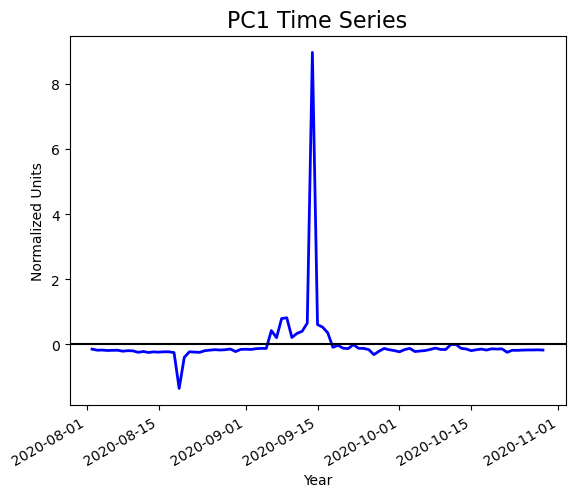

In [49]:
#### Idea : Regress the map of FWI variables against the normalized PC of the fires. See what correlations look best


frp = mr['frp_max'] ## THIS MIGHT KILL THE KERNEL
solver = Eof(frp)

eofs = solver.eofs(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)


plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
#ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

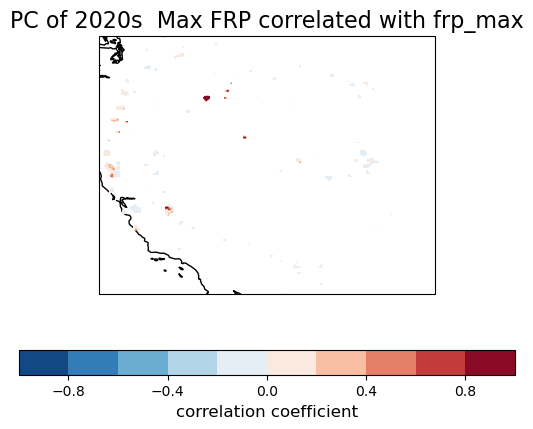

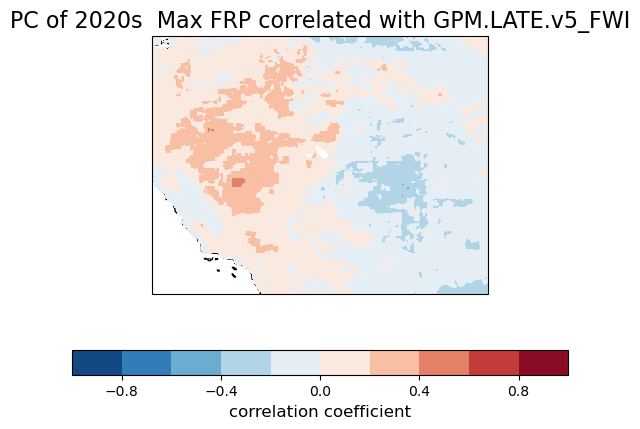

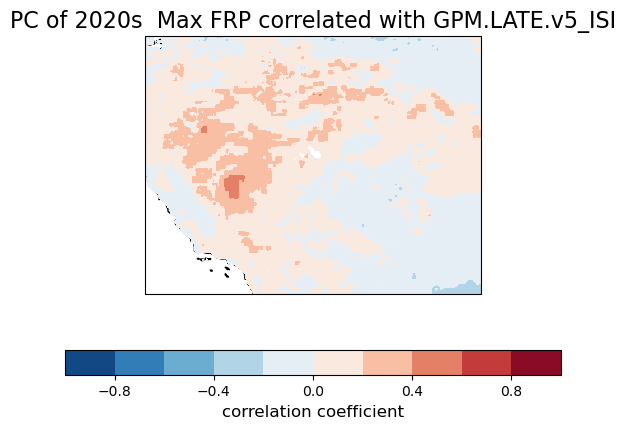

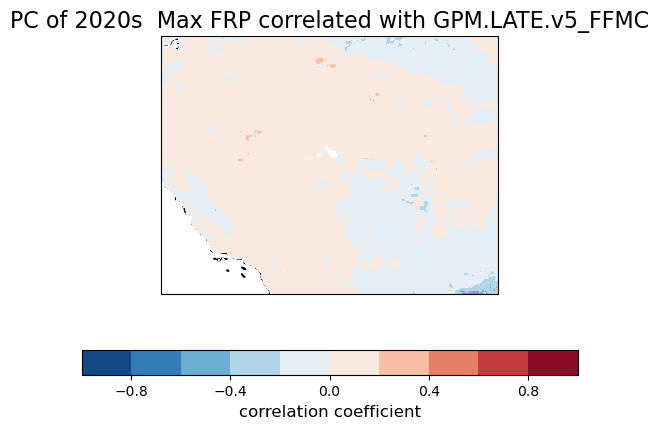

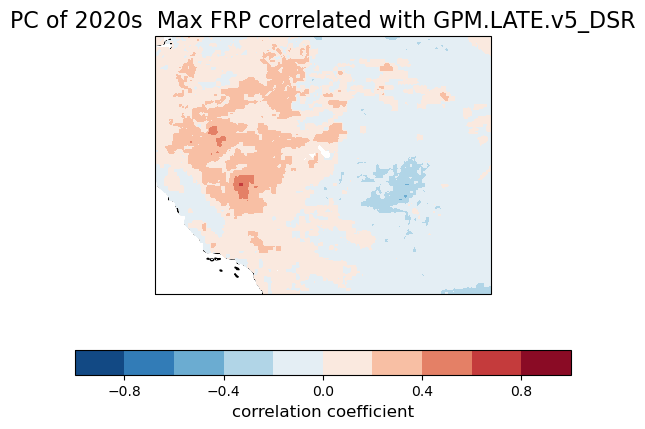

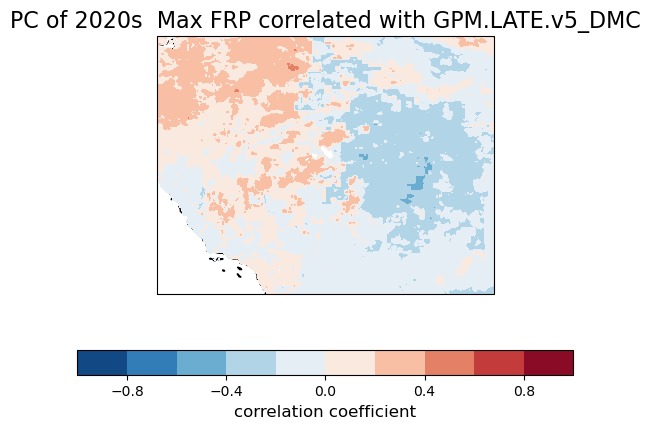

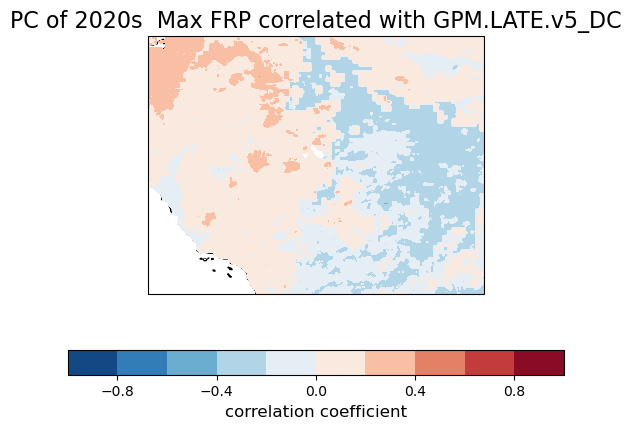

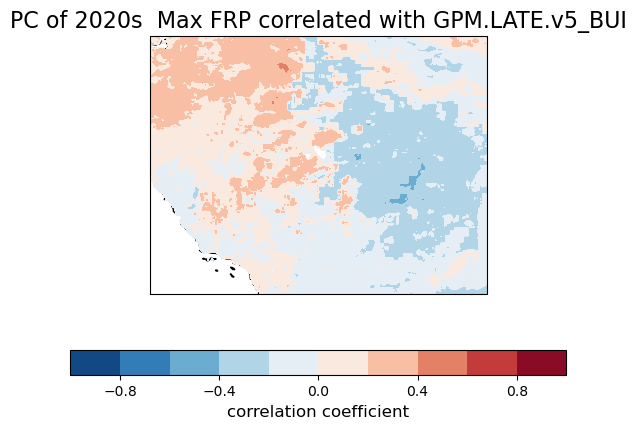

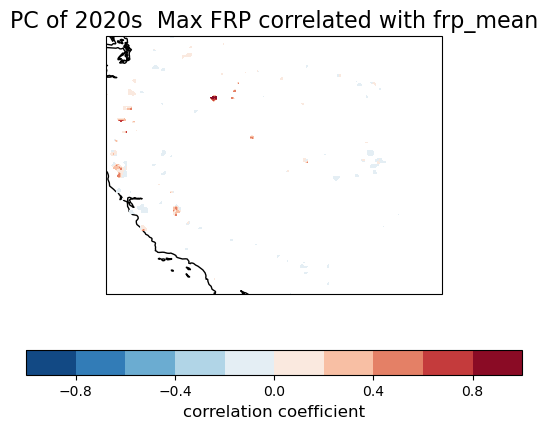

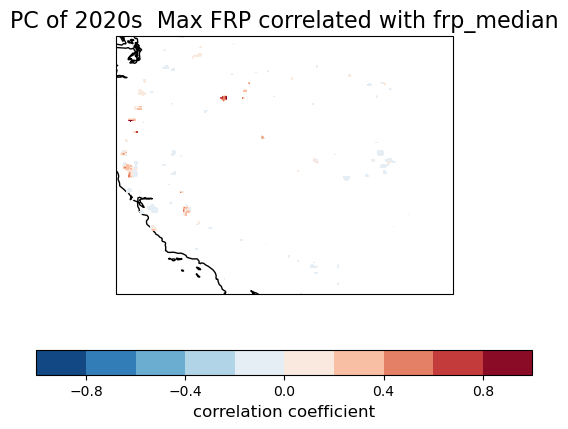

In [50]:
## Regress against the pc1

data_xr = xr.DataArray(pc1[:, 0], coords={'time': mr["frp_max"].time}, dims=["time"])
lats = mr['GPM.LATE.v5_FWI'].lat
lons = mr['GPM.LATE.v5_FWI'].lon

for v in list(mr.keys()):

    corr_plot = xr.corr(mr[v], pc1, dim = "time") 
    mr[v + "_corr"] = corr_plot
    clevs = np.linspace(-1, 1, 11)
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
    fill = ax.contourf(lons, lats, corr_plot.squeeze(), clevs,
                       transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
    ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
    cb = plt.colorbar(fill, orientation='horizontal')
    cb.set_label('correlation coefficient', fontsize=12)
    plt.title('PC of 2020s  Max FRP correlated with ' + v, fontsize=16)
    plt.show()

In [51]:
### Make a composit map of maximum correlation

names = list(mr.keys())
#names = names[names != ""]
#mr_corr = mr[mr.keys]
names

['frp_max',
 'GPM.LATE.v5_FWI',
 'GPM.LATE.v5_ISI',
 'GPM.LATE.v5_FFMC',
 'GPM.LATE.v5_DSR',
 'GPM.LATE.v5_DMC',
 'GPM.LATE.v5_DC',
 'GPM.LATE.v5_BUI',
 'frp_mean',
 'frp_median',
 'frp_max_corr',
 'GPM.LATE.v5_FWI_corr',
 'GPM.LATE.v5_ISI_corr',
 'GPM.LATE.v5_FFMC_corr',
 'GPM.LATE.v5_DSR_corr',
 'GPM.LATE.v5_DMC_corr',
 'GPM.LATE.v5_DC_corr',
 'GPM.LATE.v5_BUI_corr',
 'frp_mean_corr',
 'frp_median_corr']

In [52]:
import re

#names.re.match("_corr")

r = re.compile(".*_corr")
newlist = list(filter(r.match, names)) # Read Note below
newlist.remove('frp_max_corr')
newlist.remove('frp_mean_corr')
newlist.remove('frp_median_corr')
newlist.remove('GPM.LATE.v5_DSR_corr') ## removing because I think it might be too similar to FIW? 
print(newlist)


#?re.search

['GPM.LATE.v5_FWI_corr', 'GPM.LATE.v5_ISI_corr', 'GPM.LATE.v5_FFMC_corr', 'GPM.LATE.v5_DMC_corr', 'GPM.LATE.v5_DC_corr', 'GPM.LATE.v5_BUI_corr']


In [53]:
newlist

['GPM.LATE.v5_FWI_corr',
 'GPM.LATE.v5_ISI_corr',
 'GPM.LATE.v5_FFMC_corr',
 'GPM.LATE.v5_DMC_corr',
 'GPM.LATE.v5_DC_corr',
 'GPM.LATE.v5_BUI_corr']

In [54]:
mr_corr = mr[newlist]
mr_corr

<xarray.Dataset>
Dimensions:                (lat: 174, lon: 226, mode: 1)
Coordinates:
  * lat                    (lat) float64 31.65 31.75 31.85 ... 48.75 48.85 48.95
  * lon                    (lon) float64 -123.9 -123.8 -123.8 ... -101.5 -101.4
    spatial_ref            int64 0
  * mode                   (mode) int64 0
Data variables:
    GPM.LATE.v5_FWI_corr   (lat, lon, mode) float64 nan nan ... 0.08663 0.09107
    GPM.LATE.v5_ISI_corr   (lat, lon, mode) float64 nan nan ... 0.05063 0.05313
    GPM.LATE.v5_FFMC_corr  (lat, lon, mode) float64 nan nan ... 0.08055 0.08026
    GPM.LATE.v5_DMC_corr   (lat, lon, mode) float64 nan nan ... 0.09467 0.1005
    GPM.LATE.v5_DC_corr    (lat, lon, mode) float64 nan nan ... 0.09926 0.1106
    GPM.LATE.v5_BUI_corr   (lat, lon, mode) float64 nan nan ... 0.1008 0.1107
Attributes:
    name:        frp_max
    long_name:   frp_max
    _FillValue:  0

In [55]:
#mr_corr['GPM.LATE.v5_DC_corr']

In [166]:
### Make a temporary mr_corr xarray with numerical trasnformations for interpretation
mr_corr = mr[newlist]


mr_corr_absolute_threshold = mr_corr

# mr_corr_negative = mr_corr

# mr_corr_positive = mr_corr


# keys = list(mr_corr.keys())
# #keys = keys.remove('composit')
# print(keys)

for m in list(mr_corr.keys()):
    mr_corr_negative[m] = mr_corr[m].where(mr_corr[m] < -0.2)
    #mr_corr_negative[m] = mr_corr_negative[m].where(mr_corr_negative[m] < -0.2)
    
for m in list(mr_corr.keys()):
    mr_corr_positive[m] = mr_corr[m].where(mr_corr[m] > 0.2)

    
#for m in list(mr_corr.keys()):
for m in newlist:
    #mr_corr_absolute_threshold[m] = np.fabs(mr_corr[m])
    #mr_corr_absolute_threshold[m] = mr_corr_absolute_threshold[m].where(mr_corr_absolute_threshold[m] > 0.2)
    mr_corr_absolute_threshold[m] = mr_corr[m].where(np.fabs(mr_corr[m]) > 0.2 )
    #mr_corr_absolute_threshold[m] = mr_corr[m]
    
#mr_corr_max = mr_corr.to_array("variable").idxmax("variable") ## Previous correlation comparison

mr_corr_max = mr_corr_absolute_threshold.to_array("variable").idxmax("variable") # new with threshold
mr_corr_max_negative = mr_corr_negative.to_array("variable").idxmin("variable")
mr_corr_max_positive = mr_corr_positive.to_array("variable").idxmax("variable")

In [172]:
#mr_corr[m].where(mr_corr[m].astype("float") > 0.02)

#mr_corr_max_negative
#mr_corr_max
#mr_corr_max_positive

In [173]:
# ds = xr.Dataset({"a": ("x", [0, 1, 2, 3]), "b": ("x", [-1, 2, 0, 0]), "c": ("x", [0, 1, 4, 5])})

# ds
# tmp = ds.to_array("variable").idxmax("variable")

# tmp

# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
# fill = ax.contourf(lons, lats, mr_corr_max.squeeze(), clevs,
#                    transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
# ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
# cb = plt.colorbar(fill, orientation='horizontal')
# cb.set_label('Variable', fontsize=12)
# plt.title('Which variable was the most correlated with PC ' + v, fontsize=16)
# plt.show()


name_map = [range(0, len(newlist)), newlist]
name_map_dict = pd.DataFrame(*name_map)
name_map_dict = name_map_dict.to_dict()

mr_corr["composit"] = mr_corr_max
mr_corr["composit_number"] = mr_corr_max

pd_composit = mr_corr["composit"].to_dataframe()

test = pd_composit["composit"].apply(lambda x: name_map_dict[0].get(x))
test = test.to_xarray()
mr_corr["composit_number"] = test

#mr_corr["composit_number"] = pd_composit["composit"].map(name_map_dict, None)
# mr_corr["composit_number"] = mr_corr_max
#?mr_corr_max

#print(name_map_dict[0].get('GPM.LATE.v5_FWI_corr'))
inv_map = {v: k for k, v in name_map_dict[0].items()}
inv_map.get(0)


## A lot of trouble plotting the composit map
# import seaborn 
# mr_corr["composit_number"].plot()
#type(mr_corr["composit_number"] )
#?pd_composit["composit"].map()

'GPM.LATE.v5_FWI_corr'

In [174]:
from pylab import *
cmap = cm.get_cmap('tab20', 5)    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#1f77b4
#98df8a
#8c564b
#c7c7c7
#9edae5


In [175]:
#mr_corr

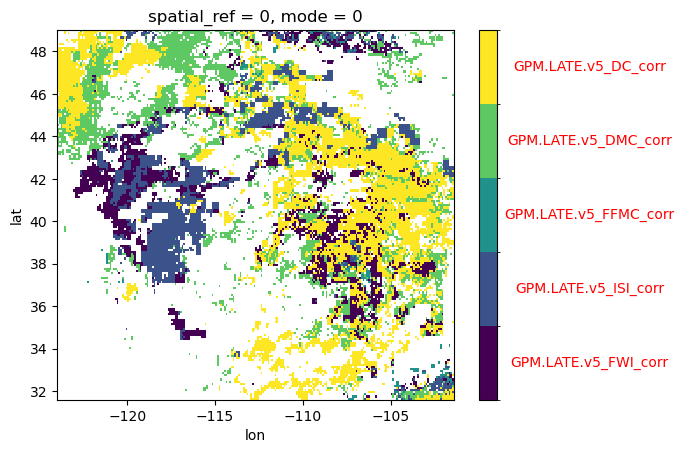

In [176]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cmap = ListedColormap([ "purple","lightseagreen", "lawngreen", "darkorange", "gold",])

qm = mr_corr["composit_number"].plot(levels=range(0, len(newlist), 1), add_colorbar = False)#, cmap = cmap)

cbar = plt.colorbar(qm)
cbar.ax.get_yaxis().set_ticks([])
for j in range(0, (len(newlist) -1), 1):
    cbar.ax.text(6, (j+.5) / 1., inv_map.get(j), ha='center', va='center', color='red')
cbar.ax.get_yaxis().labelpad = 15

#
#name_map_dict

#plt.savefig("/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/2023_CMS_figures/Comp_correlation_fwi.png", dpi=800)
plt.show()
#?plt.savefig

In [177]:
#mr_corr["composit_number"]

#1f77b4
#98df8a
#8c564b
#c7c7c7
#9edae5


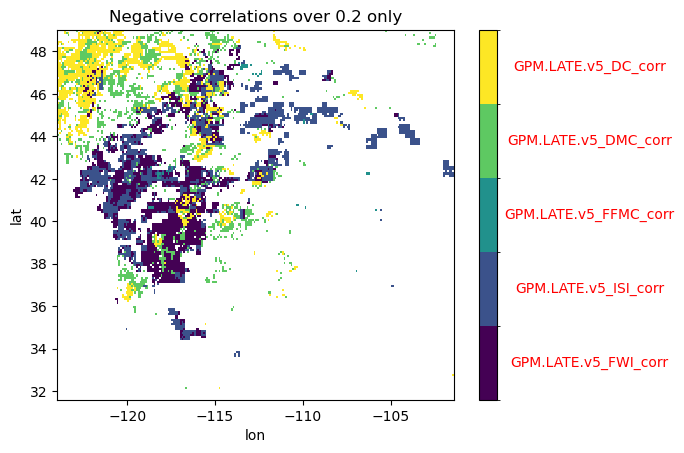

Maps of positive correlation and negative too similar. Also missing stuff that's in the composit map. What's up with that?


In [180]:
######### Negative correlations only

mr_corr = mr[newlist]

name_map = [range(0, len(newlist)), newlist]
name_map_dict = pd.DataFrame(*name_map)
name_map_dict = name_map_dict.to_dict()

mr_corr["composit"] = mr_corr_max_negative
mr_corr["composit_number"] = mr_corr_max_negative

pd_composit = mr_corr["composit"].to_dataframe()
pd_composit.composit.unique()

test = pd_composit["composit"].apply(lambda x: name_map_dict[0].get(x))
test = test.to_xarray()
mr_corr["composit_number"] = test

#mr_corr["composit_number"] = pd_composit["composit"].map(name_map_dict, None)
# mr_corr["composit_number"] = mr_corr_max
#?mr_corr_max

#print(name_map_dict[0].get('GPM.LATE.v5_FWI_corr'))
inv_map = {v: k for k, v in name_map_dict[0].items()}
inv_map.get(0)


from pylab import *
cmap = cm.get_cmap('tab20', 5)    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))
    
    
    
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#cmap = ListedColormap([ "purple","lightseagreen", "lawngreen", "darkorange", "gold",])

qm = mr_corr["composit_number"].plot(levels=range(0, len(newlist), 1), add_colorbar = False)#, cmap = cmap)

cbar = plt.colorbar(qm)
cbar.ax.get_yaxis().set_ticks([])
for j in range(0, (len(newlist) -1), 1):
    cbar.ax.text(6, (j+.5) / 1., inv_map.get(j), ha='center', va='center', color='red')
cbar.ax.get_yaxis().labelpad = 15

#
#name_map_dict

#plt.savefig("/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/2023_CMS_figures/Comp_correlation_fwi.png", dpi=800)
plt.title("Negative correlations over 0.2 only")
plt.show()

print("Maps of positive correlation and negative too similar. Also missing stuff that's in the composit map. What's up with that?")

#1f77b4
#98df8a
#8c564b
#c7c7c7
#9edae5


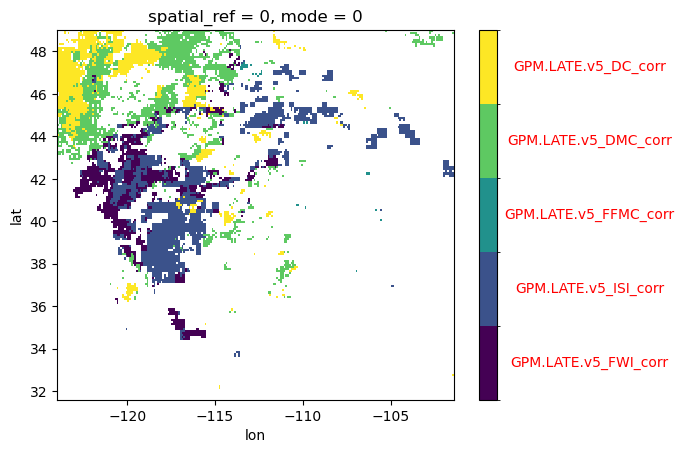

In [179]:
######### Positive correlations only

mr_corr = mr[newlist]

name_map = [range(0, len(newlist)), newlist]
name_map_dict = pd.DataFrame(*name_map)
name_map_dict = name_map_dict.to_dict()

mr_corr["composit"] = mr_corr_max_positive
mr_corr["composit_number"] = mr_corr_max_positive

pd_composit = mr_corr["composit"].to_dataframe()
pd_composit.composit.unique()

test = pd_composit["composit"].apply(lambda x: name_map_dict[0].get(x))
test = test.to_xarray()
mr_corr["composit_number"] = test

#mr_corr["composit_number"] = pd_composit["composit"].map(name_map_dict, None)
# mr_corr["composit_number"] = mr_corr_max
#?mr_corr_max

#print(name_map_dict[0].get('GPM.LATE.v5_FWI_corr'))
inv_map = {v: k for k, v in name_map_dict[0].items()}
inv_map.get(0)


from pylab import *
cmap = cm.get_cmap('tab20', 5)    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))
    
    
    
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#cmap = ListedColormap([ "purple","lightseagreen", "lawngreen", "darkorange", "gold",])

qm = mr_corr["composit_number"].plot(levels=range(0, len(newlist), 1), add_colorbar = False)#, cmap = cmap)

cbar = plt.colorbar(qm)
cbar.ax.get_yaxis().set_ticks([])
for j in range(0, (len(newlist) -1), 1):
    cbar.ax.text(6, (j+.5) / 1., inv_map.get(j), ha='center', va='center', color='red')
cbar.ax.get_yaxis().labelpad = 15

#
#name_map_dict

#plt.savefig("/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/2023_CMS_figures/Comp_correlation_fwi.png", dpi=800)
plt.show()
#?plt.savefig

In [ ]:
# import matplotlib as mpl
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# cmap = ListedColormap([ "purple","lightseagreen", "lawngreen", "darkorange", "gold",])

# qm = mr_corr["composit_number"].plot(levels=range(0, len(newlist), 1), add_colorbar = False, cmap = cmap)

# cbar = plt.colorbar(qm)
# cbar.ax.get_yaxis().set_ticks([])
# for j in range(0, (len(newlist) -1), 1):
#     cbar.ax.text(6, (j+.5) / 1., inv_map.get(j), ha='center', va='center', color='red')
# cbar.ax.get_yaxis().labelpad = 15

# #
# #name_map_dict

# #plt.savefig("/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/2023_CMS_figures/Comp_correlation_fwi.png", dpi=800)
# plt.show()
# #?plt.savefig

In [ ]:
# plt.plot_color_gradients('Qualitative',
#                      ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
#                       'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
#                       'tab20c'])

In [ ]:
name_map_dict

In [ ]:
### Do multivariate PC for all the FRP variables




In [ ]:
# cube = make_geocube(vector_data=example, 
#                     measurements = ['frp_max', "t"], #'duration', 'pixden', 'flinelen', 'fperim','farea', 'n_newpixels', 'n_pixels']
#                     datetime_measurements = ['t'],
#                     resolution = (-0.01, 0.01),
#                     group_by="t",
#                     fill=0)

In [ ]:
#cube['frp_max'].sel(t = "2020-05-17T12:00:00").plot()

In [ ]:
#?rio.open_rasterio



In [ ]:
#?rio.open_rasterio

#fire[fire[1] < 1580515200]

In [ ]:
## Read in LIS model

# print('LIS COG:')
# filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
# with rasterio.open(filepath) as src:
#     print(src.profile)

    
# # Use the same example image:
# date = '2017-06-16'

# basepath = 's3://veda-data-store-staging/EIS/COG/LIS_FORC_FWI_WEST_US/FWI/LIS_FWI_COMP_20UTC_{}0000.d01.FWI.cog'.format(4)


# with rasterio.open(basepath) as src:
#     profile = src.profile
#     oviews = src.overviews(1) # list of overviews from biggest to smallest
#     oview = oviews[1]  # Use second-highest resolution overview
#     print('Decimation factor= {}'.format(oview))
#     red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

# # d0 = 0
# # len_days = len(date_df.dates_fl)
# # fwi_LIS = np.repeat(np.nan, len_days)
# # for i in range(0, len_days):
# #     tmp_fwi = xr.open_rasterio("s3://veda-data-store-staging/EIS/COG/LIS_FORC_FWI_WEST_US/FWI/LIS_FWI_COMP_20UTC_" + date_df.dates_fl[i] +"0000.d01.FWI.cog").sel(y = 38.717, x = -120.75, method='nearest')
# #     mean_fwi = float(tmp_fwi.mean())
# #     fwi_LIS[i] = mean_fwi

# Try to super-impose the fire perimeters onto the dominant correlation



In [181]:
mr

<xarray.Dataset>
Dimensions:                (lat: 174, lon: 226, time: 89, mode: 1)
Coordinates:
  * lat                    (lat) float64 31.65 31.75 31.85 ... 48.75 48.85 48.95
  * lon                    (lon) float64 -123.9 -123.8 -123.8 ... -101.5 -101.4
  * time                   (time) datetime64[ns] 2020-08-02 ... 2020-10-29
    spatial_ref            int64 0
  * mode                   (mode) int64 0
Data variables: (12/20)
    frp_max                (time, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    GPM.LATE.v5_FWI        (time, lat, lon) float32 ...
    GPM.LATE.v5_ISI        (time, lat, lon) float32 ...
    GPM.LATE.v5_FFMC       (time, lat, lon) float32 ...
    GPM.LATE.v5_DSR        (time, lat, lon) float32 ...
    GPM.LATE.v5_DMC        (time, lat, lon) float32 ...
    ...                     ...
    GPM.LATE.v5_DSR_corr   (lat, lon, mode) float64 nan nan ... 0.05822 0.06432
    GPM.LATE.v5_DMC_corr   (lat, lon, mode) float64 nan nan ... 0.09467 0.1005
    GPM.LATE.v5_DC_corr    (lat, lon, mode) float64 nan nan ... 0.09926 0.1106
    GPM.LATE.v5_BUI_corr   (lat, lon, mode) float64 nan nan ... 0.1008 0.1107
    frp_mean_corr          (lat, lon, mode) float64 nan nan nan ... nan nan nan
    frp_median_corr        (lat, lon, mode) float64 nan nan nan ... nan nan nan
Attributes:
    name:        frp_max
    long_name:   frp_max
    _FillValue:  0

<xarray.Dataset>
Dimensions:      (time: 179, lat: 174, lon: 226)
Coordinates:
    lat          (lat) float64 31.65 31.75 31.85 31.95 ... 48.75 48.85 48.95
    lon          (lon) float64 -123.9 -123.8 -123.7 ... -101.6 -101.5 -101.4
    time         (time) datetime64[ns] 2020-08-01T12:00:00 ... 2020-10-29T12:...
    spatial_ref  int64 0
Data variables:
    frp_max      (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    frp_mean     (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    frp_median   (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0